## Tải thư viện và đọc dữ liệu

In [37]:
# Thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file dataset đã tải lên
file_path = "./gym_members_exercise_tracking.csv"  # Đường dẫn file của bạn
data = pd.read_csv(file_path)

# Xem trước dữ liệu
print("Thông tin dữ liệu:")
print(data.info())

print("\n5 dòng đầu tiên của dữ liệu:")
print(data.head())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  

## Xử lý dữ liệu
Dữ liệu của bạn có thể chứa giá trị thiếu, và chúng ta cần xử lý chúng. Một trong những cách đơn giản là điền giá trị thiếu bằng giá trị trung bình (mean) của cột đó.

In [38]:
# Kiểm tra các cột trong DataFrame
print(data.columns)

# Chọn các cột số (numeric columns)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Điền giá trị thiếu cho các cột số bằng giá trị trung bình
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Kiểm tra xem có giá trị thiếu trong dữ liệu không
print("Số lượng giá trị thiếu trong mỗi cột:")
print(data.isnull().sum())

print("\nDữ liệu sau khi xử lý:")
print(data.head())


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')
Số lượng giá trị thiếu trong mỗi cột:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

Dữ liệu sau khi xử lý:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.

## Mã Hóa Các Cột Phân Loại
Để áp dụng thuật toán Logistic Regression, các cột phân loại (categorical columns) như Gender, Workout_Type phải được chuyển thành dạng số. Chúng ta sẽ sử dụng One-Hot Encoding.

In [39]:
# Mã hóa các cột phân loại bằng One-Hot Encoding
data = pd.get_dummies(data, columns=['Gender', 'Workout_Type'], drop_first=True)

# Kiểm tra lại bộ dữ liệu
print(data.head())


   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4         

## Chia Dữ Liệu Thành Tập Huấn Luyện và Kiểm Tra
Chúng ta sẽ chia dữ liệu thành 2 phần: tập huấn luyện (80%) và tập kiểm tra (20%) để kiểm tra mô hình sau khi huấn luyện.

In [40]:
from sklearn.model_selection import train_test_split

# X là các đặc trưng (features), y là cột mục tiêu (target)
X = data.drop('Experience_Level', axis=1)  # Loại bỏ cột mục tiêu 'Experience_Level'
y = data['Experience_Level']  # Cột mục tiêu là 'Experience_Level'

# Chia dữ liệu thành 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print(f"Train size: {X_train.shape[0]} | Test size: {X_test.shape[0]}")



Train size: 778 | Test size: 195


## Chuẩn Hóa Dữ Liệu
Trước khi huấn luyện mô hình Logistic Regression, chúng ta nên chuẩn hóa dữ liệu để giúp thuật toán học nhanh hơn và hiệu quả hơn.

In [41]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo bộ chuẩn hóa
scaler = StandardScaler()

# Chuẩn hóa các đặc trưng
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Kiểm tra kết quả chuẩn hóa
print(X_train[:5])



[[-1.53304512 -0.88120507 -0.97008833 -0.68108593  1.70030809  0.64940678
  -0.40374901  0.48828894 -0.16547852  0.93198659  0.7420429  -0.4972275
   0.93767108 -0.54665472 -0.6100279   1.82930826]
 [ 0.03035419 -0.61565746 -0.5824516  -1.54719389  1.63084945  0.1077413
  -0.99771086 -0.50711149  0.4109795  -1.56371867 -0.37030657 -0.37838126
  -1.06647205  1.82930826 -0.6100279  -0.54665472]
 [ 1.2646168   0.09563078 -0.03976017  1.22435159  0.72788721 -0.29850781
  -0.8492204  -0.86500827  0.21882682 -1.23095797 -0.37030657  0.1229061
  -1.06647205 -0.54665472 -0.6100279  -0.54665472]
 [-1.20390843 -0.69627013 -1.66783446  0.61807602  0.93626311  0.78482315
  -0.64133375 -0.3281631   1.06750113 -0.23267586 -1.48265605  0.16556885
  -1.06647205 -0.54665472 -0.6100279  -0.54665472]
 [-1.53304512 -0.38804522 -1.59030711  0.44485442 -1.14749592 -1.65267151
  -0.67103184 -0.93211392  0.47503039 -0.73181692  0.7420429   0.54343896
  -1.06647205 -0.54665472 -0.6100279   1.82930826]]


## Huấn luyện mô hình Logistic Regression
Khởi Tạo và Huấn Luyện Mô Hình Logistic Regression

Bây giờ, chúng ta sẽ khởi tạo mô hình Logistic Regression và huấn luyện nó với dữ liệu đã chuẩn hóa.

In [42]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)

# Huấn luyện mô hình với tập huấn luyện
logistic_model.fit(X_train, y_train)

# Kiểm tra kết quả huấn luyện
print("Huấn luyện mô hình thành công!")



Huấn luyện mô hình thành công!


## Dự Đoán và Đánh Giá Mô Hình
Sau khi huấn luyện xong mô hình, chúng ta sẽ sử dụng tập kiểm tra để dự đoán và đánh giá mô hình bằng cách sử dụng accuracy score và ma trận nhầm lẫn.

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Dự đoán trên tập kiểm tra
y_pred = logistic_model.predict(X_test)

# Tính độ chính xác (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.2f}")

Độ chính xác của mô hình: 0.88


predict() dự đoán giá trị của cột mục tiêu cho tập kiểm tra.

accuracy_score() tính toán độ chính xác của mô hình bằng cách so sánh các giá trị dự đoán với các giá trị thực tế.

confusion_matrix() tạo ma trận nhầm lẫn, và ConfusionMatrixDisplay giúp vẽ ma trận này một cách trực quan.


## Hiển thị biểu đồ Confusion Matrix
Mục tiêu: Trực quan hóa kết quả phân loại.


<Figure size 800x600 with 0 Axes>

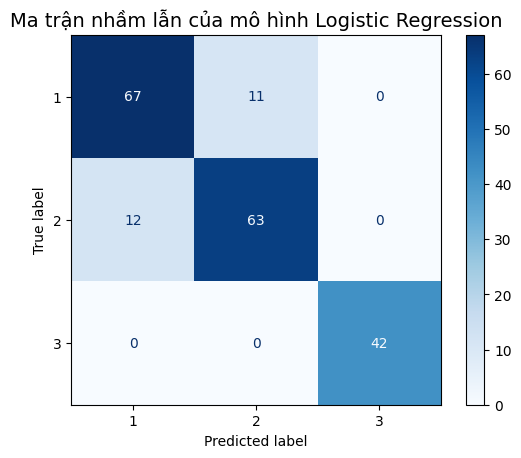

In [44]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Ma trận nhầm lẫn của mô hình Logistic Regression', fontsize=14)
plt.show()
